Straight line alphabets = A,E,F,H,I,K,L,M,N,T,V,W,X,Y,Z.

In [ ]:
 There are Model 1 , Model 2 and Model 3.

In [ ]:
### Data

1. lettr = capital letter (26 values from A to Z)
2. x-box = horizontal position of box (integer)
3. y-box = vertical position of box (integer)
4. width = width of box (integer)
5. high = height of box (integer)
6. onpix = total # on pixels (integer)
7. x-bar = mean x of on pixels in box (integer)
8. y-bar = mean y of on pixels in box (integer)
9. x2bar = mean x variance (integer)
10. y2bar = mean y variance (integer)
11. xybar = mean x y correlation (integer)
12. x2ybr = mean of x * x * y (integer)
13. xy2br = mean of x * y * y (integer)
14. x-ege = mean edge count left to right (integer)
15. xegvy = correlation of x-ege with y (integer)
16. y-ege = mean edge count bottom to top (integer)
17. yegvx = correlation of y-ege with x (integer)

In [ ]:
 #we can drop the duplicate values because it is less then 40%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

In [2]:
df=pd.read_csv("letters.csv")

In [3]:
list1=["A","E","F","H","I","K","L","M","N","T","V","W","X","Y","Z"]

In [4]:
df = df[df.lettr.isin(list1)]

In [5]:
df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [6]:
df.tail()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
19990,W,3,8,5,6,5,11,11,2,2,5,8,7,7,12,1,7
19992,E,4,9,5,6,3,5,9,2,10,10,8,9,2,8,5,5
19994,T,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11515 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   11515 non-null  object
 1   x-box   11515 non-null  int64 
 2   y-box   11515 non-null  int64 
 3   width   11515 non-null  int64 
 4   high    11515 non-null  int64 
 5   onpix   11515 non-null  int64 
 6   x-bar   11515 non-null  int64 
 7   y-bar   11515 non-null  int64 
 8   x2bar   11515 non-null  int64 
 9   y2bar   11515 non-null  int64 
 10  xybar   11515 non-null  int64 
 11  x2ybar  11515 non-null  int64 
 12  xy2bar  11515 non-null  int64 
 13  x-ege   11515 non-null  int64 
 14  xegvy   11515 non-null  int64 
 15  y-ege   11515 non-null  int64 
 16  yegvx   11515 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
count,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000
mean,4.017716,7.037429,5.226487,5.322710,3.427008,6.628832,7.696135,3.813548,5.069040,8.158836,6.730786,7.899349,3.243508,8.441077,3.173686,7.481546
std,1.975848,3.302912,2.156974,2.247474,2.241836,2.154079,2.636441,2.711934,2.672015,2.542508,2.952632,1.808496,2.648724,1.723424,2.592071,1.550853
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,7.000000,2.000000,3.000000,7.000000,5.000000,7.000000,1.000000,8.000000,1.000000,7.000000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,3.000000,5.000000,7.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,5.000000,7.000000,10.000000,9.000000,9.000000,5.000000,10.000000,5.000000,8.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,15.000000,15.000000,15.000000,14.000000,14.000000,15.000000,15.000000,14.000000,14.000000,15.000000


In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
lettr,11515,15,T,796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x-box,11515.0,NaN,NaN,NaN,4.017716,1.975848,0.0,3.0,4.0,5.0,15.0
y-box,11515.0,NaN,NaN,NaN,7.037429,3.302912,0.0,5.0,7.0,9.0,15.0
width,11515.0,NaN,NaN,NaN,5.226487,2.156974,0.0,4.0,5.0,6.0,15.0
high,11515.0,NaN,NaN,NaN,5.32271,2.247474,0.0,4.0,6.0,7.0,15.0
onpix,11515.0,NaN,NaN,NaN,3.427008,2.241836,0.0,2.0,3.0,5.0,15.0
x-bar,11515.0,NaN,NaN,NaN,6.628832,2.154079,0.0,6.0,7.0,8.0,14.0
y-bar,11515.0,NaN,NaN,NaN,7.696135,2.636441,0.0,7.0,7.0,9.0,15.0
x2bar,11515.0,NaN,NaN,NaN,3.813548,2.711934,0.0,2.0,3.0,5.0,15.0
y2bar,11515.0,NaN,NaN,NaN,5.06904,2.672015,0.0,3.0,5.0,7.0,15.0


In [45]:
df.xy2bar.value_counts()

8.0     4024
9.0     1625
7.0     1401
6.0      875
5.0      767
10.0     673
11.0     444
4.0      388
12.0     319
Name: xy2bar, dtype: int64

### Data cleanup

In [10]:
df.isnull().sum()

lettr     0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

In [11]:
df.duplicated().sum()

999

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.shape

(10516, 17)

### Outlier Treatment

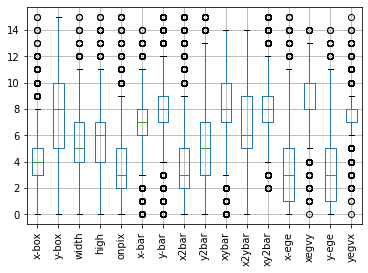

In [15]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [16]:
def treat_outliers(x):
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    IQR=q3-q1
    lower_bound=q1-(1.5*IQR)
    upper_bound=q3+(1.5*IQR)
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [17]:
df_num=df.select_dtypes(exclude="object")
num_list=df_num.columns
num_list

Index(['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar',
       'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'x-ege', 'xegvy', 'y-ege',
       'yegvx'],
      dtype='object')

In [18]:
for i in num_list:
    df[i]=treat_outliers(df[i])

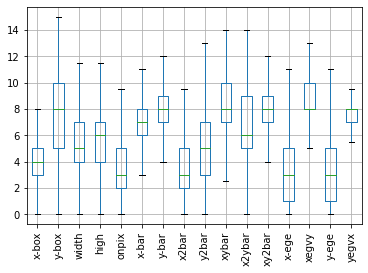

In [19]:
df[num_list].boxplot()
plt.xticks(rotation=90)
plt.show()

### Spliting of data

In [20]:
x = df.drop("lettr",axis=1)
y = df.lettr

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=123)

In [22]:
x_train.shape

(7361, 16)

In [23]:
x_test.shape

(3155, 16)

#### Standard scaler

In [24]:
sclr = StandardScaler()

In [25]:
x_train = sclr.fit_transform(x_train)

In [26]:
x_test = sclr.transform(x_test) #to keep it as unseen data

## SVM

In [27]:
from sklearn.svm import SVC

In [28]:
svc = SVC()

In [29]:
svc.fit(x_train,y_train)

SVC()

In [30]:
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)

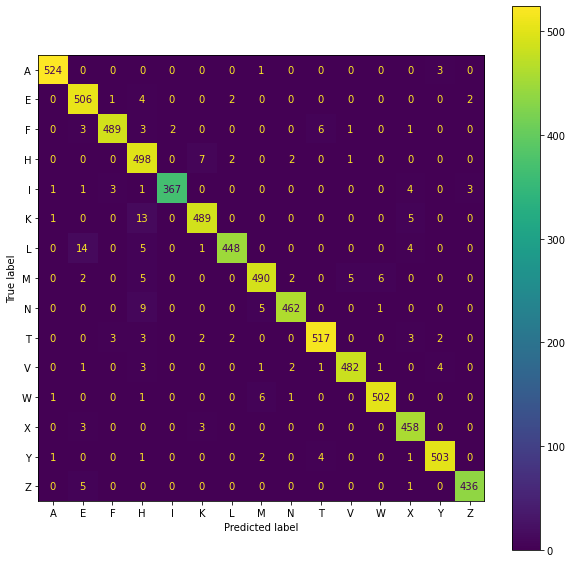

In [31]:
fig, ax = plt.subplots( figsize=(10, 10))
plot_confusion_matrix(svc,x_train,y_train, ax=ax)

In [32]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       528
           E       0.95      0.98      0.96       515
           F       0.99      0.97      0.98       505
           H       0.91      0.98      0.94       510
           I       0.99      0.97      0.98       380
           K       0.97      0.96      0.97       508
           L       0.99      0.95      0.97       472
           M       0.97      0.96      0.97       510
           N       0.99      0.97      0.98       477
           T       0.98      0.97      0.98       532
           V       0.99      0.97      0.98       495
           W       0.98      0.98      0.98       511
           X       0.96      0.99      0.97       464
           Y       0.98      0.98      0.98       512
           Z       0.99      0.99      0.99       442

    accuracy                           0.97      7361
   macro avg       0.98      0.97      0.97      7361
weighted avg       0.97   

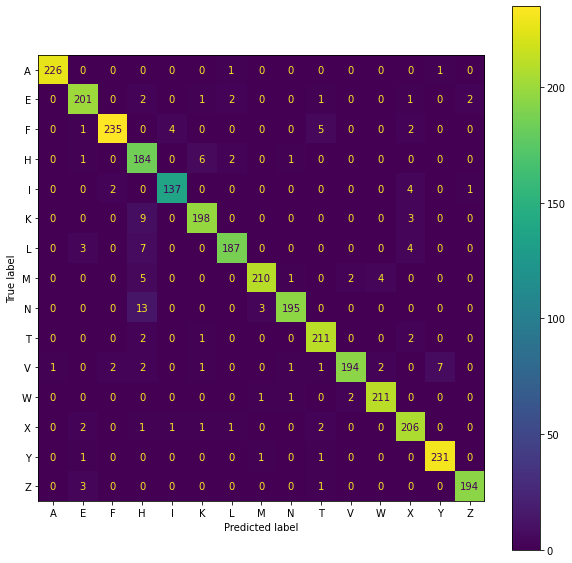

In [33]:
fig, ax = plt.subplots( figsize=(10, 10))
plot_confusion_matrix(svc,x_test,y_test,ax=ax)

In [34]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           A       1.00      0.99      0.99       228
           E       0.95      0.96      0.95       210
           F       0.98      0.95      0.97       247
           H       0.82      0.95      0.88       194
           I       0.96      0.95      0.96       144
           K       0.95      0.94      0.95       210
           L       0.97      0.93      0.95       201
           M       0.98      0.95      0.96       222
           N       0.98      0.92      0.95       211
           T       0.95      0.98      0.96       216
           V       0.98      0.92      0.95       211
           W       0.97      0.98      0.98       215
           X       0.93      0.96      0.94       214
           Y       0.97      0.99      0.98       234
           Z       0.98      0.98      0.98       198

    accuracy                           0.96      3155
   macro avg       0.96      0.96      0.96      3155
weighted avg       0.96   

### Tuning

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {"kernel" :["linear","rbf","poly"],
             "C" : [0.1,1,10,100],
             "gamma" : [0.0001,0.01,0.1,1,10]}

svc1 = SVC(random_state=10)
grid_search = GridSearchCV(estimator=svc1,param_grid=param_grid,cv = 5)

In [37]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=10),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [38]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [39]:
svc1 = grid_search.best_estimator_

In [40]:
y_pred_train = svc1.predict(x_train)
y_pred_test = svc1.predict(x_test)

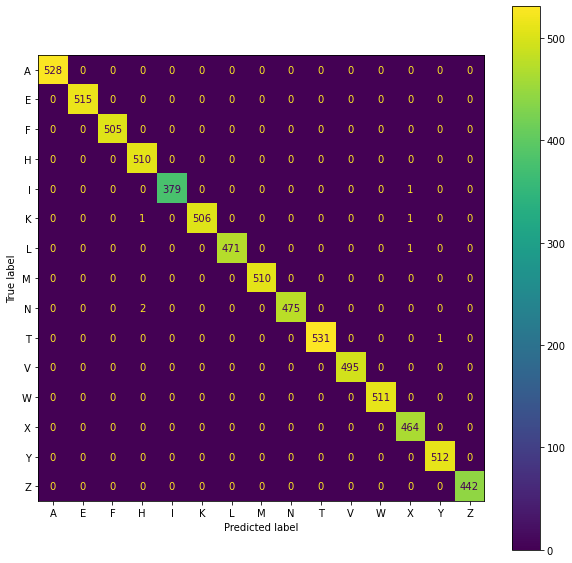

In [41]:
fig, ax = plt.subplots( figsize=(10, 10))
plot_confusion_matrix(svc1,x_train,y_train,ax=ax)

In [42]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       528
           E       1.00      1.00      1.00       515
           F       1.00      1.00      1.00       505
           H       0.99      1.00      1.00       510
           I       1.00      1.00      1.00       380
           K       1.00      1.00      1.00       508
           L       1.00      1.00      1.00       472
           M       1.00      1.00      1.00       510
           N       1.00      1.00      1.00       477
           T       1.00      1.00      1.00       532
           V       1.00      1.00      1.00       495
           W       1.00      1.00      1.00       511
           X       0.99      1.00      1.00       464
           Y       1.00      1.00      1.00       512
           Z       1.00      1.00      1.00       442

    accuracy                           1.00      7361
   macro avg       1.00      1.00      1.00      7361
weighted avg       1.00   

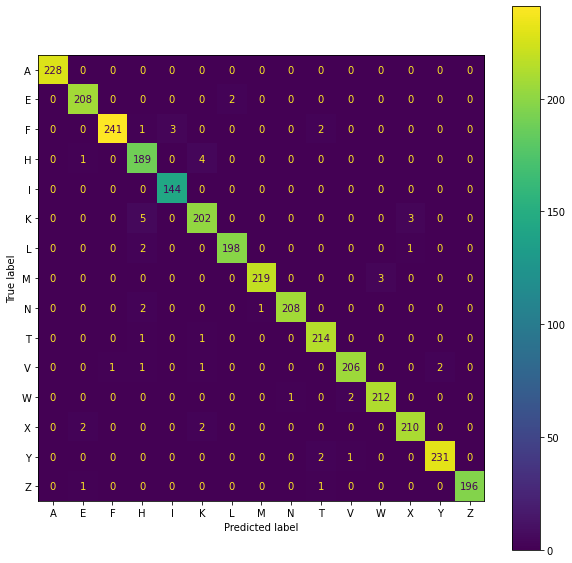

In [43]:
fig, ax = plt.subplots( figsize=(10, 10))
plot_confusion_matrix(svc1,x_test,y_test,ax=ax)

In [44]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       228
           E       0.98      0.99      0.99       210
           F       1.00      0.98      0.99       247
           H       0.94      0.97      0.96       194
           I       0.98      1.00      0.99       144
           K       0.96      0.96      0.96       210
           L       0.99      0.99      0.99       201
           M       1.00      0.99      0.99       222
           N       1.00      0.99      0.99       211
           T       0.98      0.99      0.98       216
           V       0.99      0.98      0.98       211
           W       0.99      0.99      0.99       215
           X       0.98      0.98      0.98       214
           Y       0.99      0.99      0.99       234
           Z       1.00      0.99      0.99       198

    accuracy                           0.98      3155
   macro avg       0.98      0.98      0.98      3155
weighted avg       0.98   